In [221]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib inLine
from scipy.stats import linregress

In [2]:
heartdiseaseCSVPath = "data/heart_2020_cleaned.csv"
heartdiseaseDF = pd.read_csv(heartdiseaseCSVPath)

In [3]:
heartdiseaseDF.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [57]:
yesheartDisease = heartdiseaseDF[(heartdiseaseDF["HeartDisease"] == "Yes")]
yesheartDisease

yesheartdiseaseMeanBMI = yesheartDisease.groupby("HeartDisease")["BMI"].mean()
yesheartdiseaseMeanPhysicalHealth = yesheartDisease.groupby("HeartDisease")["PhysicalHealth"].mean()
yesheartdiseaseMeanMentalHealth = yesheartDisease.groupby("HeartDisease")["MentalHealth"].mean()
yesheartdiseaseMeanSleepTime = yesheartDisease.groupby("HeartDisease")["SleepTime"].mean()

yesheartdiseaseAvg = {
    "Mean BMI": yesheartdiseaseMeanBMI,
    "Mean Physical Health": yesheartdiseaseMeanPhysicalHealth,
    "Mean Mental Health": yesheartdiseaseMeanMentalHealth,
    "Mean Sleep Time": yesheartdiseaseMeanSleepTime
}

yesheartdiseaseAvgDF = pd.DataFrame(yesheartdiseaseAvg)
yesheartdiseaseAvgDF

,Mean BMI,Mean Physical Health,Mean Mental Health,Mean Sleep Time
HeartDisease,,,,
Yes,29.401592,7.808242,4.641764,7.136156


In [59]:
noheartDisease = heartdiseaseDF[(heartdiseaseDF["HeartDisease"] == "No")]
noheartDisease

noheartdiseaseMeanBMI = noheartDisease.groupby("HeartDisease")["BMI"].mean()
noheartdiseaseMeanPhysicalHealth = noheartDisease.groupby("HeartDisease")["PhysicalHealth"].mean()
noheartdiseaseMeanMentalHealth = noheartDisease.groupby("HeartDisease")["MentalHealth"].mean()
noheartdiseaseMeanSleepTime = noheartDisease.groupby("HeartDisease")["SleepTime"].mean()

noheartdiseaseAvg = {
    "BMI": noheartdiseaseMeanBMI,
    "Physical Health": noheartdiseaseMeanPhysicalHealth,
    "Mental Health": noheartdiseaseMeanMentalHealth,
    "Sleep Time": noheartdiseaseMeanSleepTime
}

noheartdiseaseAvgDF = pd.DataFrame(noheartdiseaseAvg)
noheartdiseaseAvgDF

,BMI,Physical Health,Mental Health,Sleep Time
HeartDisease,,,,
No,28.224658,2.956416,3.828778,7.093416


In [33]:
#Summary Statistics for numerical categories
combined_AvgDF = pd.concat([yesheartdiseaseAvgDF, noheartdiseaseAvgDF]).agg(['mean', 'median', 'var', 'std', 'sem'])
combined_AvgDF



,Mean BMI,Mean Physical Health,Mean Mental Health,Mean Sleep Time
mean,28.813125,5.382329,4.235271,7.114786
median,28.813125,5.382329,4.235271,7.114786
var,0.692587,11.770108,0.330473,0.000913
std,0.832218,3.430759,0.574868,0.030222
sem,0.588467,2.425913,0.406493,0.021370


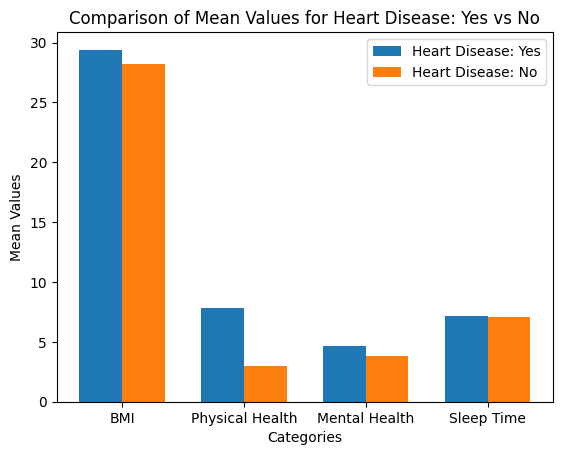

In [7]:
import matplotlib.pyplot as plt

# Define the categories and mean values for heart disease 'yes' and 'no'
categories = ['BMI', 'Physical Health', 'Mental Health', 'Sleep Time']
mean_values_yes = [29.401592, 7.808242, 4.641764, 7.136156]
mean_values_no = [28.224658, 2.956416, 3.828778, 7.093416]

# Set the width of the bars
bar_width = 0.35

# Set the x locations for the groups
index = range(len(categories))

# Create the bar chart
plt.bar(index, mean_values_yes, bar_width, label='Heart Disease: Yes')
plt.bar([i + bar_width for i in index], mean_values_no, bar_width, label='Heart Disease: No')

# Add labels, title, and legend
plt.xlabel('Categories')
plt.ylabel('Mean Values')
plt.title('Comparison of Mean Values for Heart Disease: Yes vs No')
plt.xticks([i + bar_width / 2 for i in index], categories)
plt.legend()

# Show the plot
plt.show()

HeartDisease  AgeCategory
Yes           80 or older    5449
              70-74          4847
              65-69          4101
              75-79          4049
              60-64          3327
              55-59          2202
              50-54          1383
              45-49           744
              40-44           486
              35-39           296
              30-34           226
              25-29           133
              18-24           130
Name: count, dtype: int64
HeartDisease  AgeCategory
No            60-64          30359
              65-69          30050
              55-59          27555
              70-74          26218
              50-54          23999
              45-49          21047
              18-24          20934
              40-44          20520
              35-39          20254
              80 or older    18704
              30-34          18527
              75-79          17433
              25-29          16822
Name: count, dtype: int64

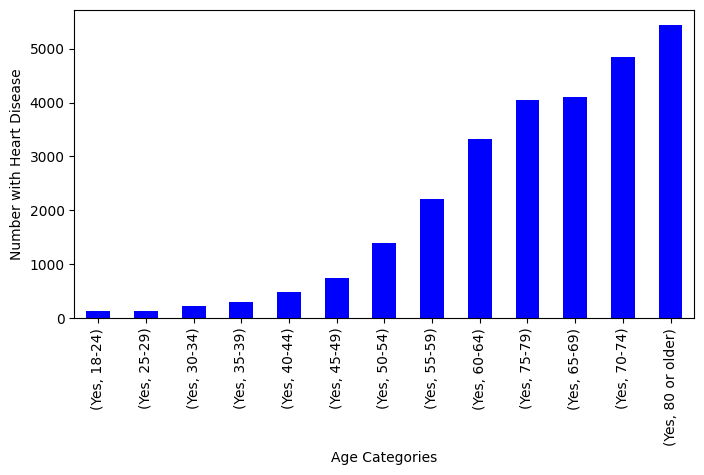

In [74]:
#age group comparison
heartdiseaseAgeCategory = yesheartDisease.groupby("HeartDisease")["AgeCategory"].value_counts()
noheartdiseaseAgeCategory = noheartDisease.groupby("HeartDisease")["AgeCategory"].value_counts()

print(heartdiseaseAgeCategory)
print(noheartdiseaseAgeCategory)

heartdiseaseAges = heartdiseaseAgeCategory.groupby("AgeCategory").value_counts()
numberperCategory = heartdiseaseAgeCategory.sort_values(ascending=True)
numberperCategory.plot(kind="bar", color = 'blue', figsize=(8,4))
plt.xlabel("Age Categories")
plt.ylabel("Number with Heart Disease")
plt.show()

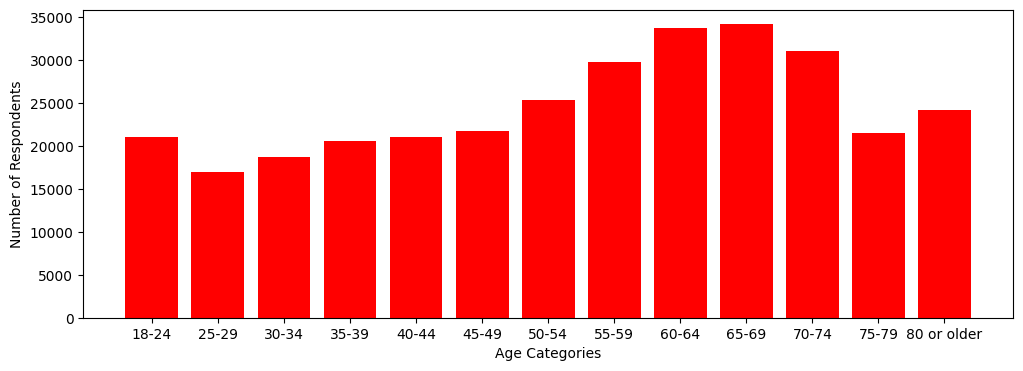

In [9]:
agecategoryCount = heartdiseaseDF.groupby('AgeCategory').size().reset_index(name='Count')

plt.figure(figsize=(12, 4))
plt.bar(agecategoryCount.index, agecategoryCount['Count'], color='red')
plt.xlabel("Age Categories")
plt.ylabel("Number of Respondents")
plt.xticks(range(len(agecategoryCount)), agecategoryCount['AgeCategory'])
plt.show()

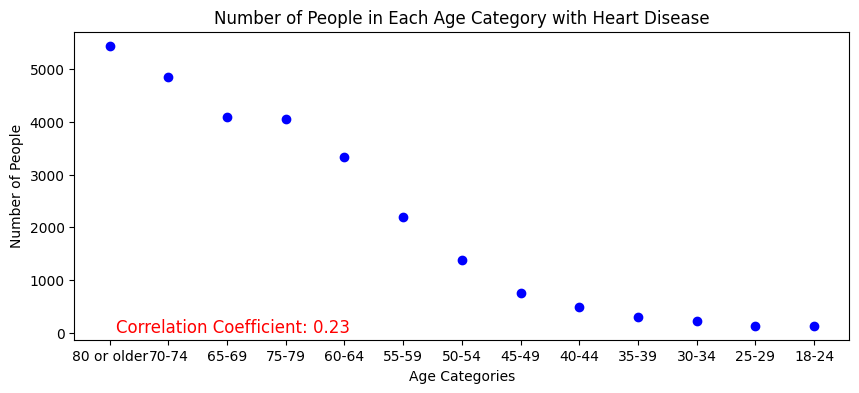

In [38]:
# pull age categories and the amount of people in each category
heartdiseaseAgeCategory = yesheartDisease.groupby("HeartDisease")["AgeCategory"].value_counts().reset_index(name='Count')

#Scatter plot of Ages with Heart Disease
plt.figure(figsize=(10, 4))
plt.scatter(heartdiseaseAgeCategory['AgeCategory'], heartdiseaseAgeCategory['Count'], color='blue')
plt.text(0.1, 1.8, f'Correlation Coefficient: {.2334:.2f}', fontsize=12, color='red')
plt.xlabel("Age Categories")
plt.ylabel("Number of People")
plt.title("Number of People in Each Age Category with Heart Disease")
plt.show()

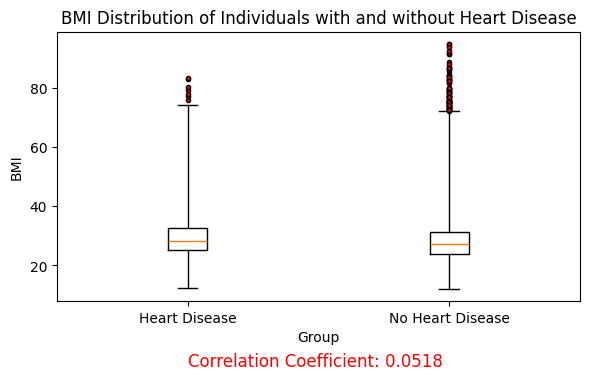

In [143]:
plt.figure(figsize=(6, 4))  
plt.boxplot([yesheartDisease['BMI'], noheartDisease['BMI']], labels=['Heart Disease', 'No Heart Disease'], whis=5.5, flierprops=dict(marker='o', markerfacecolor='red', markersize=3))
plt.xlabel('Group')
plt.ylabel('BMI')
plt.title('BMI Distribution of Individuals with and without Heart Disease')
plt.text(1, -14, f'Correlation Coefficient: {.0518:.4f}', fontsize=12, color='red')
plt.tight_layout()
plt.show()

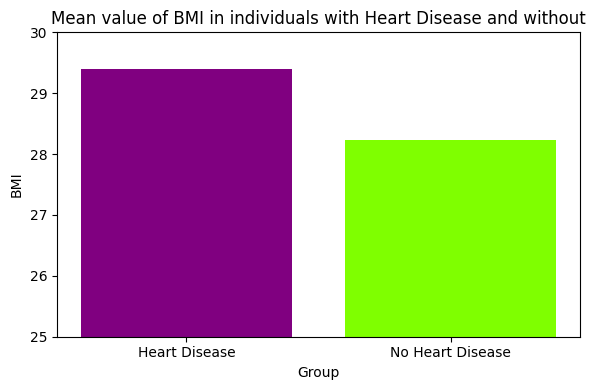

In [118]:
yesStats = yesheartDisease['BMI'].agg('mean')
noStats = noheartDisease['BMI'].agg('mean')
colorStats = ['purple', 'chartreuse']

plt.figure(figsize=(6, 4))
plt.bar(['Heart Disease', 'No Heart Disease'], [yesStats, noStats], color=colorStats)
plt.xlabel('Group')
plt.ylabel('BMI')
plt.title('Mean value of BMI in individuals with Heart Disease and without')
plt.ylim(25, 30)
plt.tight_layout()
plt.show()



In [12]:
#correlate sleep with presence of heart disease
heartdiseaseDF['HeartDisease'] = heartdiseaseDF['HeartDisease'].replace({'Yes': 1, 'No': 0})
heartdiseaseDF

correlation=heartdiseaseDF['SleepTime'].corr(heartdiseaseDF['HeartDisease'])
print(correlation)

0.008326646858286435


C:\Users\JPHin\AppData\Local\Temp\ipykernel_88472\1095548225.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heartdiseaseDF['HeartDisease'] = heartdiseaseDF['HeartDisease'].replace({'Yes': 1, 'No': 0})


In [13]:
#Correlate BMI and Heart Disease
bmiCorrelation = heartdiseaseDF['BMI'].corr(heartdiseaseDF['HeartDisease'])
bmiCorrelation

0.051803190655746005

In [14]:
#correlation of mental health and heart disease
mentalhealthCorrelation = heartdiseaseDF['MentalHealth'].corr(heartdiseaseDF['HeartDisease'])
mentalhealthCorrelation

0.028590714546906072

In [15]:
heartdiseaseDF['AgeCategory'] = heartdiseaseDF['AgeCategory'].replace({'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12})
heartdiseaseDF

agecorrelation = heartdiseaseDF['AgeCategory'].corr(heartdiseaseDF['HeartDisease'])
agecorrelation

C:\Users\JPHin\AppData\Local\Temp\ipykernel_88472\1141735448.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heartdiseaseDF['AgeCategory'] = heartdiseaseDF['AgeCategory'].replace({'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12})


0.23343223812190994

In [16]:
heartdiseaseDF['HeartDisease'] = heartdiseaseDF['HeartDisease'].replace({'Yes': 1, 'No': 0})
heartdiseaseDF
heartdiseaseDF['Smoking'] = heartdiseaseDF['Smoking'].replace({'Yes': 1, 'No': 0})
heartdiseaseDF

C:\Users\JPHin\AppData\Local\Temp\ipykernel_88472\3946283968.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heartdiseaseDF['Smoking'] = heartdiseaseDF['Smoking'].replace({'Yes': 1, 'No': 0})


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,No,No,3.0,30.0,No,Female,7,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,0,No,Yes,0.0,0.0,No,Female,12,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,1,No,No,20.0,30.0,No,Male,9,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,0,No,No,0.0,0.0,No,Female,11,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,0,No,No,28.0,0.0,Yes,Female,4,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,No,No,7.0,0.0,Yes,Male,8,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,1,No,No,0.0,0.0,No,Male,3,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,0,No,No,0.0,0.0,No,Female,5,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,0,No,No,0.0,0.0,No,Female,1,Hispanic,No,No,Good,12.0,No,No,No


In [17]:
smokingCorrelation = heartdiseaseDF['Smoking'].corr(heartdiseaseDF['HeartDisease'])
smokingCorrelation

0.10776415602593753

In [18]:
heartdiseaseDF['AlcoholDrinking'] = heartdiseaseDF['AlcoholDrinking'].replace({'Yes': 1, 'No': 0})
heartdiseaseDF

C:\Users\JPHin\AppData\Local\Temp\ipykernel_88472\3709976797.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heartdiseaseDF['AlcoholDrinking'] = heartdiseaseDF['AlcoholDrinking'].replace({'Yes': 1, 'No': 0})


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,No,3.0,30.0,No,Female,7,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,0,0,Yes,0.0,0.0,No,Female,12,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,1,0,No,20.0,30.0,No,Male,9,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,0,0,No,0.0,0.0,No,Female,11,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,0,0,No,28.0,0.0,Yes,Female,4,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,No,7.0,0.0,Yes,Male,8,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,1,0,No,0.0,0.0,No,Male,3,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,0,0,No,0.0,0.0,No,Female,5,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,0,0,No,0.0,0.0,No,Female,1,Hispanic,No,No,Good,12.0,No,No,No


In [19]:
DrinkingCorrelation = heartdiseaseDF['AlcoholDrinking'].corr(heartdiseaseDF['HeartDisease'])
DrinkingCorrelation
                                                            

-0.03207974262500583

In [20]:
heartdiseaseDF['HeartDisease'] = heartdiseaseDF['HeartDisease'].replace({1: 'Yes', 0: 'No'})

In [21]:
heartdiseaseDF.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,1,0,No,3.0,30.0,No,Female,7,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,0,0,Yes,0.0,0.0,No,Female,12,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,1,0,No,20.0,30.0,No,Male,9,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,0,0,No,0.0,0.0,No,Female,11,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,0,0,No,28.0,0.0,Yes,Female,4,White,No,Yes,Very good,8.0,No,No,No


In [22]:
heartdiseaseDF['HeartDisease'] = heartdiseaseDF['HeartDisease'].replace({1: 'Yes', 0: 'No'})
heartdiseaseDF['Smoking'] = heartdiseaseDF['Smoking'].replace({1: 'Yes', 0: 'No'})
heartdiseaseDF['AlcoholDrinking'] = heartdiseaseDF['AlcoholDrinking'].replace({1: 'Yes', 0: 'No'})
heartdiseaseDF['AgeCategory'] = heartdiseaseDF['AgeCategory'].replace({0: '18-24', 1: '25-29', 2: '30-34', 3: '35-39', 4: '40-44', 5: '45-49', 6: '50-54', 7: '55-59', 8: '60-64', 9: '65-69', 10: '70-74', 11: '75-79', 12: '80 or older'})
heartdiseaseDF

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


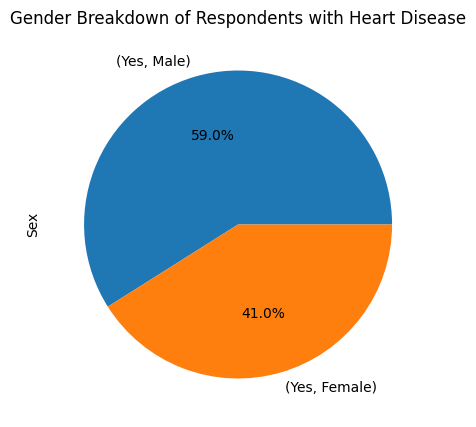

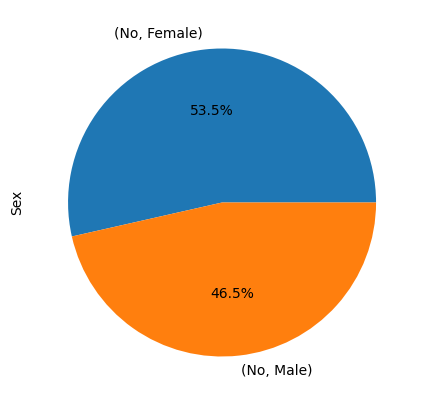

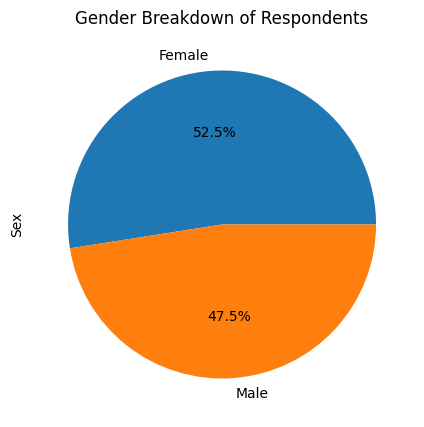

<Figure size 640x480 with 0 Axes>

In [23]:
genderedheartDisease = yesheartDisease.groupby('HeartDisease')['Sex'].value_counts()
genderednoheartDisease = noheartDisease.groupby('HeartDisease')['Sex'].value_counts()
allgenderData = heartdiseaseDF.groupby('Sex').size()

genderedheartDisease.plot(kind='pie', y='Sex', figsize=(5, 5), autopct='%1.1f%%', legend=False)
plt.ylabel('Sex')
plt.title('Gender Breakdown of Respondents with Heart Disease')
plt.show()

genderednoheartDisease.plot(kind='pie', y='Sex', figsize=(5, 5), autopct='%1.1f%%', legend=False)
plt.ylabel('Sex')
plt.show()

allgenderData.plot(kind='pie', y='Sex', figsize=(5, 5), autopct='%1.1f%%', legend=False)
plt.ylabel('Sex')
plt.title('Gender Breakdown of Respondents')
plt.show()



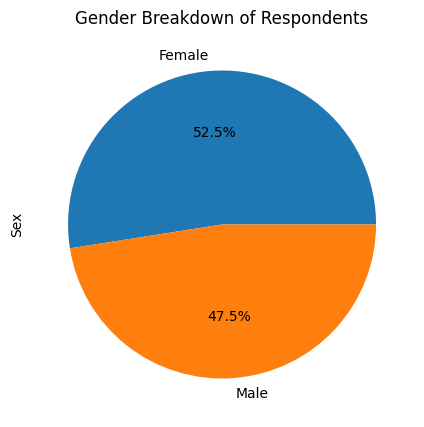

In [30]:
allgenderData.plot(kind='pie', y='Sex', figsize=(5, 5), autopct='%1.1f%%', legend=False)
plt.ylabel('Sex')
plt.title('Gender Breakdown of Respondents')
plt.show()

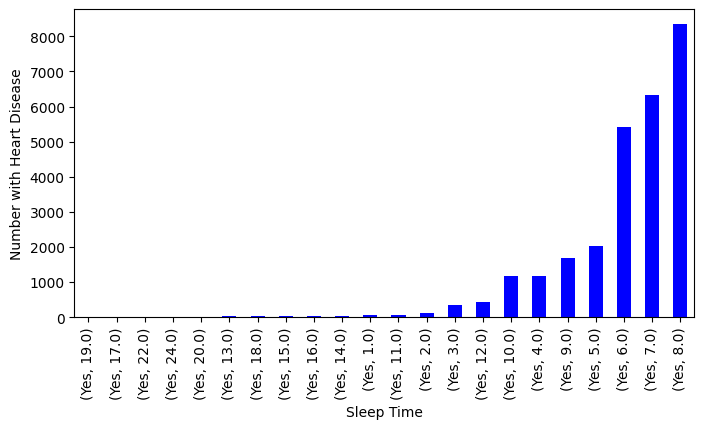

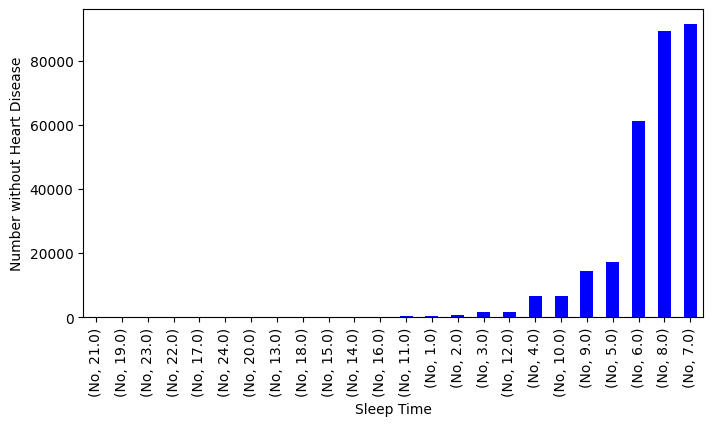

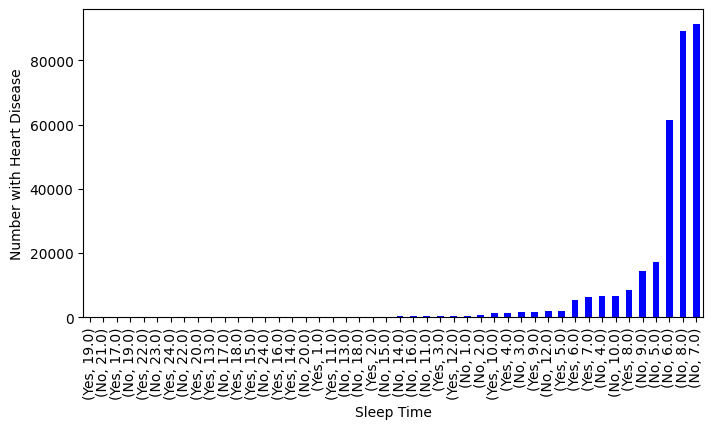

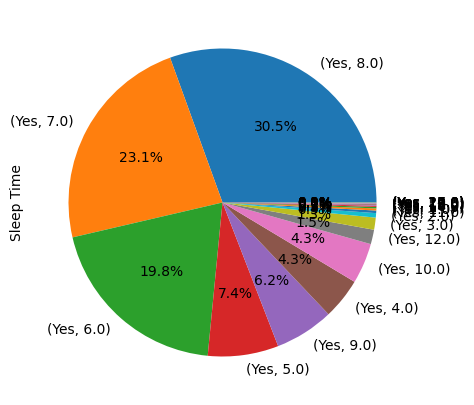

In [71]:
#sleep time
heartdiseasesleepTime = yesheartDisease.groupby("HeartDisease")["SleepTime"].value_counts()
noheartdiseasesleepTime = noheartDisease.groupby("HeartDisease")["SleepTime"].value_counts()
allheartdisease = heartdiseaseDF.groupby("HeartDisease")["SleepTime"].value_counts()

heartdiseaseSleep = heartdiseasesleepTime.groupby("SleepTime").value_counts()
numberperCategory = heartdiseasesleepTime.sort_values(ascending=True)
numberperCategory.plot(kind="bar", color = 'blue', figsize=(8,4))
plt.xlabel("Sleep Time")
plt.ylabel("Number with Heart Disease")
plt.show()

heartdiseaseSleep = noheartdiseasesleepTime.groupby("SleepTime").value_counts()
numberperCategory = noheartdiseasesleepTime.sort_values(ascending=True)
numberperCategory.plot(kind="bar", color = 'blue', figsize=(8,4))
plt.xlabel("Sleep Time")
plt.ylabel("Number without Heart Disease")
plt.show()

heartdiseaseSleep = allheartdisease.groupby("SleepTime").value_counts()
numberperCategory = allheartdisease.sort_values(ascending=True)
numberperCategory.plot(kind="bar", color = 'blue', figsize=(8,4))
plt.xlabel("Sleep Time")
plt.ylabel("Number with Heart Disease")
plt.show()


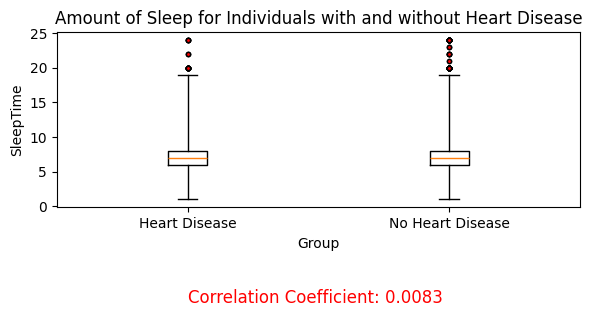

In [142]:
plt.figure(figsize=(6, 4))  
plt.boxplot([yesheartDisease['SleepTime'], noheartDisease['SleepTime']], labels=['Heart Disease', 'No Heart Disease'], whis=5.5, flierprops=dict(marker='o', markerfacecolor='red', markersize=3))
plt.xlabel('Group')
plt.ylabel('SleepTime')
plt.title('Amount of Sleep for Individuals with and without Heart Disease')
plt.text(1, -14, f'Correlation Coefficient: {.0083:.4f}', fontsize=12, color='red')
plt.tight_layout()
plt.show()

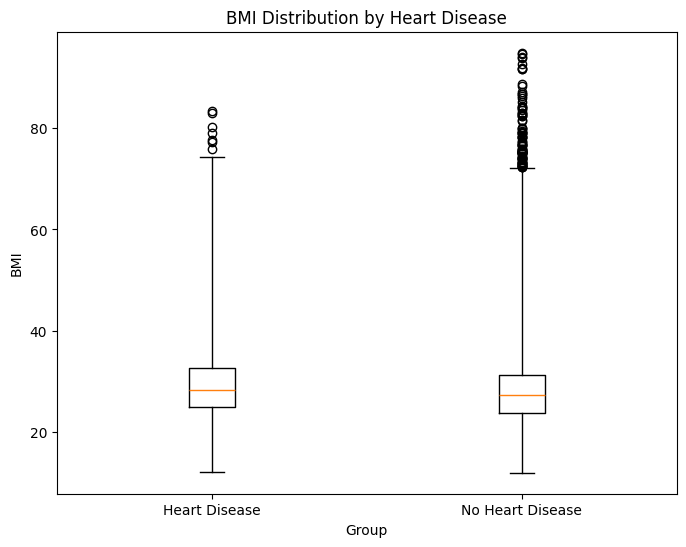

In [25]:
#BMI

plt.figure(figsize=(8, 6))  
plt.boxplot([yesheartDisease['BMI'], noheartDisease['BMI']], labels=['Heart Disease', 'No Heart Disease'], whis=5.5)
plt.xlabel('Group')
plt.ylabel('BMI')
plt.title('BMI Distribution by Heart Disease')
plt.show()

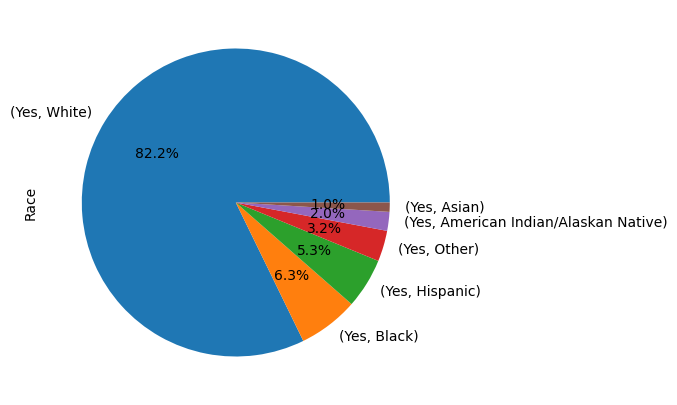

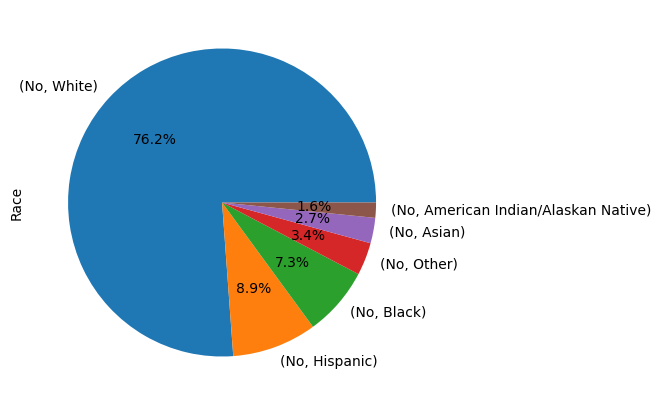

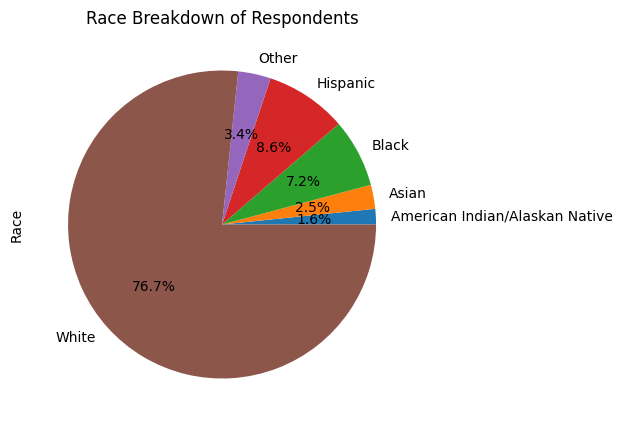

In [31]:
#Race
raceheartDisease = yesheartDisease.groupby('HeartDisease')['Race'].value_counts()
racenoheartDisease = noheartDisease.groupby('HeartDisease')['Race'].value_counts()
allraceData = heartdiseaseDF.groupby('Race').size()

raceheartDisease.plot(kind='pie', y='Race', figsize=(5, 5), autopct='%1.1f%%', legend=False)
plt.ylabel('Race')
plt.show()

racenoheartDisease.plot(kind='pie', y='Race', figsize=(5, 5), autopct='%1.1f%%', legend=False)
plt.ylabel('Race')
plt.show()

allraceData.plot(kind='pie', y='Race', figsize=(5, 5), autopct='%1.1f%%', legend=False)
plt.ylabel('Race')
plt.title('Race Breakdown of Respondents')
plt.show()

In [27]:
#smoking and drinking
yesheartdiseaseSmoking = yesheartDisease.groupby('HeartDisease')['Smoking'].value_counts()
yesheartdiseaseDrinking = yesheartDisease.groupby('HeartDisease')['AlcoholDrinking'].value_counts()

lifestyle = {
    "Smoking": yesheartdiseaseSmoking,
    "Alcohol Drinking": yesheartdiseaseDrinking
}

lifestyleDF = pd.DataFrame(lifestyle)
lifestyleDF

Smoking  Alcohol Drinking
HeartDisease                               
Yes          No     11336             26232
             Yes    16037              1141

In [223]:
heartdiseaseSmoking = heartdiseaseDF.groupby('HeartDisease')['Smoking'].value_counts()
heartdiseaseDrinking = heartdiseaseDF.groupby('HeartDisease')['AlcoholDrinking'].value_counts()

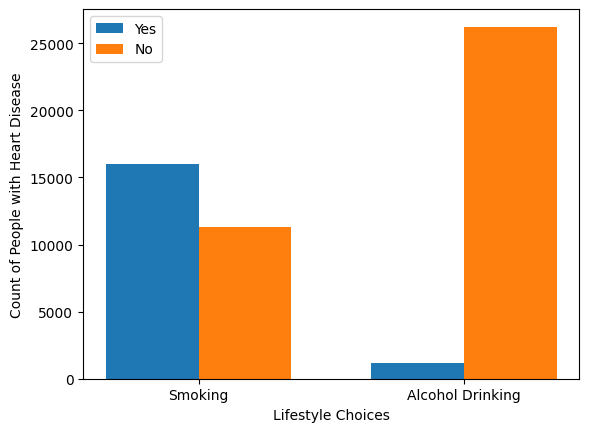

In [29]:
categories = ['Smoking', 'Alcohol Drinking']
yes_values = [16037, 11336]
no_values = [11336, 26232]

index = range(len(categories))
bar_width = 0.35

plt.bar(index, yes_values, bar_width, label='Yes')
plt.bar([i + bar_width for i in index], no_values, bar_width, label='No')

plt.xlabel('Lifestyle Choices')
plt.ylabel('Count of People with Heart Disease')
plt.xticks([i + bar_width/2 for i in index], categories)
plt.legend()
plt.show()

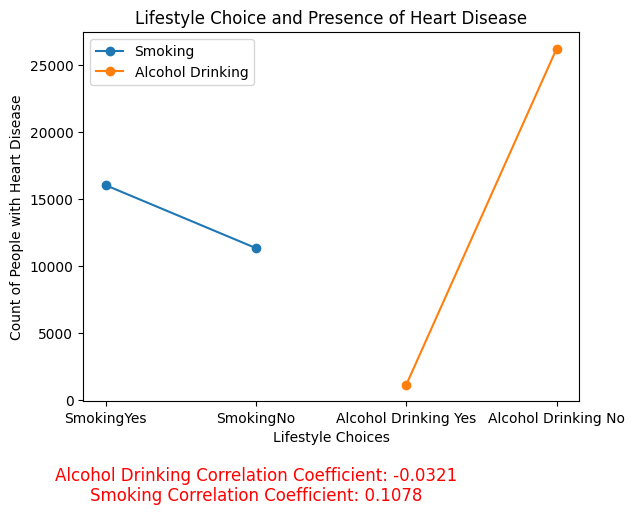

In [220]:
categories = ['SmokingYes', 'SmokingNo', 'Alcohol Drinking Yes', 'Alcohol Drinking No']
smokingValues = [16037, 11336, 0, 0]
drinkingValues = [0, 0, 1141, 26232]

plt.plot(categories[:2], smokingValues[:2], marker='o', label='Smoking')
plt.plot(categories[2:], drinkingValues[2:], marker='o', label='Alcohol Drinking')

plt.xlabel('Lifestyle Choices')
plt.ylabel('Count of People with Heart Disease')
plt.legend()
plt.title('Lifestyle Choice and Presence of Heart Disease')
plt.text(1, -6500, f'Smoking Correlation Coefficient: {.1078:.4f}', fontsize=12, color='red', va='top', ha='center')
plt.text(1, -5000, f'Alcohol Drinking Correlation Coefficient: {-.0321:.4f}', fontsize=12, color='red', va='top', ha='center')
plt.show()